# Exercício 04
## Dados desbalanceados
### Alunos:

 - Lucas Henrique Mantovani Jacintho - 10258942
 - Victor Luiz Fortes Rivelo - 9762960
 - Vinicius Henrique Borges - 9771546


---

O dataset que será utilizado nessa questão possui 5 variáveis (`Deviations	EmotionCount	NumberWord	SucRate	Time2ans`) de entrada numéricas e 1 variável (`True Value`) de saída que representa a classe. Esse problema possui 3 classes possíveis, `-1`, `0` e `1`.

**Esse exerício possui material complementar ("Undersampling e Oversampling")**

### Questão 01.
Carregue o dataset `DataBaseDT.csv` e mostre a distribuição das classes:

*   Via histograma
*   Exibindo o número de ocorrências de cada classe



In [0]:
import pandas as pd

In [0]:
dataset = pd.read_csv('/content/DataBaseDT.csv')

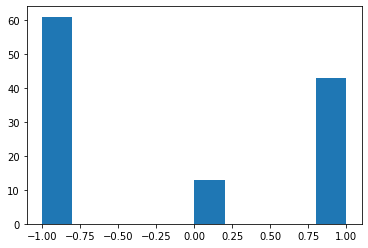

In [3]:
dataset['True Value'].hist(grid=False);

In [4]:
dataset['True Value'].value_counts()

-1    61
 1    43
 0    13
Name: True Value, dtype: int64



---

### Questão 02.

Utilize a técnica de subamostragem aleatória nesse conjunto de dados. Ao final da sua operação, todas as classes devem ter o número de ocorrências da classe com **menor representatividade no conjunto de dados inicial**.

In [5]:
class_0 = dataset[dataset['True Value'] == 0]
class_1 = dataset[dataset['True Value'] == 1]
class_negative_1 = dataset[dataset['True Value'] == -1]

n_samples = dataset['True Value'].value_counts().min()

sample_negative_1 = class_negative_1.sample(n=n_samples, replace=False)
sample_1 = class_1.sample(n=n_samples, replace=False)

undersampled_dataset = pd.concat((class_0, sample_1, sample_negative_1))
undersampled_dataset['True Value'].value_counts()

-1    13
 1    13
 0    13
Name: True Value, dtype: int64



---

### Questão 03.

Utilize a técnica de superamostragem aleatória nesse conjunto de dados. Ao final da sua operação, todas as classes devem ter o número de ocorrências da classe com **maior representatividade no conjunto de dados inicial**.

In [6]:
class_0 = dataset[dataset['True Value'] == 0]
class_1 = dataset[dataset['True Value'] == 1]
class_negative_1 = dataset[dataset['True Value'] == -1]

n_samples = dataset['True Value'].value_counts().max()

sample_0 = class_0.sample(n=n_samples, replace=True)
sample_1 = class_1.sample(n=n_samples, replace=True)

oversampled_dataset = pd.concat((class_negative_1, sample_0, sample_1))
oversampled_dataset['True Value'].value_counts()

 1    61
 0    61
-1    61
Name: True Value, dtype: int64

---

### Questão 04.

Utilize as técnicas de subamostragem e superamostragem nesse conjunto de dados. Ao final da sua operação, todas as classes devem ter o número de ocorrências **igual à $\frac{tamanho\_dataset}{3}$**.

In [7]:
class_0 = dataset[dataset['True Value'] == 0]
class_1 = dataset[dataset['True Value'] == 1]
class_negative_1 = dataset[dataset['True Value'] == -1]

n_samples = dataset['True Value'].shape[0] // 3

sample_negative_1 = class_negative_1.sample(n=n_samples, replace=False)
sample_0 = class_0.sample(n=n_samples, replace=True)
sample_1 = class_1.sample(n=n_samples, replace=False)

one_third_dataset = pd.concat((sample_0, sample_1, sample_negative_1))
one_third_dataset['True Value'].value_counts()

-1    39
 1    39
 0    39
Name: True Value, dtype: int64



---

### Questão 05.

Para cada um dos conjuntos utilizados nas questões 1 a 4, separe o conjunto de dados em variáveis de entrada e variável alvo e normalize as **variáveis de entrada** entre 0 e 1 (`sklearn.preprocessing.MinMaxScaler`). 

In [0]:
from sklearn.preprocessing import minmax_scale

In [0]:
undersampled_dataset_X, undersampled_dataset_y = minmax_scale(undersampled_dataset.iloc[:, :-1]), undersampled_dataset.iloc[:, -1]
oversampled_dataset_X, oversampled_dataset_y = minmax_scale(oversampled_dataset.iloc[:, :-1]), oversampled_dataset.iloc[:, -1]
one_third_dataset_X, one_third_dataset_y = minmax_scale(one_third_dataset.iloc[:, :-1]), one_third_dataset.iloc[:, -1]



---

### Questão 06.

Teste o score de classificação, utilizando a função `model_tester` abaixo, para cada um dos conjuntos da questão anterior.

In [0]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score
from sklearn.metrics import balanced_accuracy_score
import numpy as np


def model_tester(inputs, target, weights=None):
  """
  Executa classificação do conjunto de dados passado
  ---------------------------------------------------------------
  inputs:     Variáveis de entrada (X)
  target:     Variáveis alvo (y)  
  weights:    Dicionário com o peso de cada classe. Cada chave do dicionário é
              uma classe, e seu valor o associado a essa classe. Por exemplo, se
              tivermos duas classes 0 e 1 com mesmo peso, teremos o dicionario:
              {0: 0.5, 1: 0.5}

  ---------------------------------------------------------------
  Realiza a classificação em 3 modelos (SVM com kernel linear, 
  SVM com kernel polinomial de grau 3, Árvore de decisão)
  O desempenho é calculado utilizando a acurácia balanceada.
  """

  if isinstance(inputs, pd.core.frame.DataFrame):
    inputs = inputs.values
  if isinstance(target, pd.core.frame.DataFrame) or isinstance(target, pd.core.series.Series):
    target = target.values
  testes = {
    "SVM Linear" : SVC(kernel='linear', class_weight=weights),
    "SVM Polinomial grau 3" : SVC(kernel='poly', degree=3, class_weight=weights),
    "Decision Tree (gini)" : DecisionTreeClassifier(criterion='gini', class_weight=weights)    
  }
  for teste in testes:
    clf = testes[teste]    
    skf = StratifiedKFold(n_splits=10)
    scores = []
    for train_index, test_index in skf.split(inputs, target):      
      X_train, X_test = inputs[train_index], inputs[test_index]
      y_train, y_test = target[train_index], target[test_index]
      clf.fit(X_train, y_train)
      y_pred = clf.predict(X_test)      
      # scores.append(precision_score(y_test, y_pred,labels=[-1, 0, 1], average='macro', zero_division=0))
      scores.append(balanced_accuracy_score(y_test, y_pred))
    print("Score do classificador '%s': %.2f" % (teste, np.mean(scores)*100))

In [18]:
print("----------under-------------")
model_tester(undersampled_dataset_X, undersampled_dataset_y)
print("----------over--------------")
model_tester(oversampled_dataset_X, oversampled_dataset_y)
print("----------one/third---------")
model_tester(one_third_dataset_X, one_third_dataset_y)

----------under-------------
Score do classificador 'SVM Linear': 63.33
Score do classificador 'SVM Polinomial grau 3': 63.33
Score do classificador 'Decision Tree (gini)': 66.67
----------over--------------
Score do classificador 'SVM Linear': 69.44
Score do classificador 'SVM Polinomial grau 3': 74.84
Score do classificador 'Decision Tree (gini)': 93.97
----------one/third---------
Score do classificador 'SVM Linear': 69.72
Score do classificador 'SVM Polinomial grau 3': 75.00
Score do classificador 'Decision Tree (gini)': 83.06




---

### Questão 07.

Teste o score de classificação no conjunto original alterando o parâmetro `weights`. Esse parâmetro faz com que o algoritmo de classificação leve em conta o peso de cada classe no processo de treinamento. Teste 2 conjuntos de `weights` diferentes e compare com o resultado do conjunto original sem o uso dessa variavel.

In [12]:
weights = {
    -1: 0.5,
    0: 0.2,
    1: 0.3
}
model_tester(dataset.iloc[:, :-1], dataset.iloc[:, -1], weights)

Score do classificador 'SVM Linear': 58.97
Score do classificador 'SVM Polinomial grau 3': 33.33
Score do classificador 'Decision Tree (gini)': 61.72


In [13]:
weights = {
    -1: 0.3,
    0: 0.2,
    1: 0.5
}
model_tester(dataset.iloc[:, :-1], dataset.iloc[:, -1], weights)

Score do classificador 'SVM Linear': 62.63
Score do classificador 'SVM Polinomial grau 3': 35.61
Score do classificador 'Decision Tree (gini)': 65.63


In [14]:
weights = 'balanced'
model_tester(dataset.iloc[:, :-1], dataset.iloc[:, -1], weights)

Score do classificador 'SVM Linear': 69.69
Score do classificador 'SVM Polinomial grau 3': 36.67
Score do classificador 'Decision Tree (gini)': 62.28


In [15]:
weights = None
model_tester(dataset.iloc[:, :-1], dataset.iloc[:, -1], weights)

Score do classificador 'SVM Linear': 60.63
Score do classificador 'SVM Polinomial grau 3': 32.78
Score do classificador 'Decision Tree (gini)': 62.75


Podemos ver que os exemplos que atribuem menor peso às classes mais dominantes apresentam uma acurácia relativamente maior do que as outras (neste caso, o exemplo com valor 'balanced'). Isso se deve ao fato do algoritmo de treinamento dar uma maior ênfase às classes que possuem maior peso, de modo que menos exemplos do dataset são suficientes para treinar adequadamente tais classes. Por fim, a lista de pesos acaba por compensar o desbalanceamento do dataset.

Utilizando a fórmula do parâmetro 'balanced', obtemos os seguintes valores pros pesos de cada classe:

Classe -1: 0.63934426

Classe 1: 0.90697674

Classe 0: 3.0